In [149]:
# Dependencies and Setup
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.axes as ax
import pandas as pd
import numpy as np
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# Hide warning messages in notebook
import warnings
warnings.filterwarnings('ignore')

# File to Load (Remember to Change These)
mouse_drug_data_to_load = "mouse_drug_data.csv"
clinical_trial_data_to_load = "clinicaltrial_data.csv"

# Read the Mouse and Drug Data and the Clinical Trial Data
mouse_drug_df = pd.read_csv(mouse_drug_data_to_load)
clinicaltrial_df = pd.read_csv(clinical_trial_data_to_load)

# Combine the data into a single dataset
full_df = clinicaltrial_df.merge(mouse_drug_df, on="Mouse ID", how="left")

# Display the data table for preview
full_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug
0,b128,0,45.0,0,Capomulin
1,f932,0,45.0,0,Ketapril
2,g107,0,45.0,0,Ketapril
3,a457,0,45.0,0,Ketapril
4,c819,0,45.0,0,Ketapril


## Tumor Response to Treatment

In [106]:
# Store the Mean Tumor Volume Data Grouped by Drug and Timepoint 
# .mean() calculates the average
# .reset_index() turn grouped indexes back to columns
# .drop() remove unwanted column
drug_timepoint_group = full_df.groupby(["Drug", "Timepoint"]).mean().reset_index().drop(columns=["Metastatic Sites"]) 

# Preview DataFrame
drug_timepoint_group.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,45.000000
1,Capomulin,5,44.266086
2,Capomulin,10,43.084291
3,Capomulin,15,42.064317
4,Capomulin,20,40.716325


In [107]:
# Store the Standard Error of Tumor Volumes Grouped by Drug and Timepoint
# .sem() calculates standard error of the mean 
# .reset_index() turn grouped indexes back to columns
# .drop() remove unwanted column
sem_drug_timepoint_group = full_df.groupby(["Drug", "Timepoint"]).sem().reset_index()\
                                            .drop(columns=["Metastatic Sites", "Mouse ID"])
# Flatten sem for plotting
flat_sem_drug_timepoint_group = full_df.groupby(["Drug", "Timepoint"]).sem()\
                                            .drop(columns=["Metastatic Sites", "Mouse ID"]).unstack(level=0)

# Remove "Tumor Volume (mm3)" from the hierarchical columns index
flat_sem_drug_timepoint_group.columns = flat_sem_drug_timepoint_group.columns.droplevel() 

# Preview DataFrame
sem_drug_timepoint_group.head()

,Drug,Timepoint,Tumor Volume (mm3)
0,Capomulin,0,0.000000
1,Capomulin,5,0.448593
2,Capomulin,10,0.702684
3,Capomulin,15,0.838617
4,Capomulin,20,0.909731


In [123]:
# Minor Data Munging to Re-Format the Data Frames
# .mean() calculates the average
# .unstack() flattens data removing hierarchical indexing
# .drop() remove unwanted column
flat_drug_timepoint_group = full_df.groupby(["Drug", "Timepoint"]).mean()\
                                            .drop(columns=["Metastatic Sites"]).unstack(level=0)

# Remove "Tumor Volume (mm3)" from the hierarchical columns index
flat_drug_timepoint_group.columns = flat_drug_timepoint_group.columns.droplevel()

# Preview that Reformatting worked
flat_drug_timepoint_group.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000
5,44.266086,46.503051,47.062001,47.389175,46.796098,47.125589,47.248967,43.944859,47.527452,46.851818
10,43.084291,48.285125,49.403909,49.582269,48.694210,49.423329,49.101541,42.531957,49.463844,48.689881
15,42.064317,50.094055,51.296397,52.399974,50.933018,51.359742,51.067318,41.495061,51.529409,50.779059
20,40.716325,52.157049,53.197691,54.920935,53.644087,54.364417,53.346737,40.238325,54.067395,53.170334


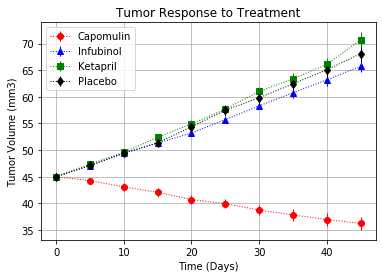

In [109]:
# Generate the Plot (with Error Bars)
x_axis = flat_drug_timepoint_group.index.tolist() # Create the abcissa

# Create function that plots same configuration for all graphs
def std_plot_config(abcissa, capo_data, capo_err, infu_data, infu_err, keta_data, keta_err, plac_data, plac_err, 
                    x_label, y_label, plot_title, output_fig, fig_dpi):
    plt.errorbar(x=abcissa,
                 y=capo_data,
                 yerr=capo_err,
                 marker="o",
                 color="red",
                 ls=":",
                 linewidth=1,
                 label="Capomulin")
    plt.errorbar(x=abcissa,
                 y=infu_data,
                 yerr=infu_err,
                 marker="^",
                 color="blue",
                 ls=":",
                 linewidth=1,
                 label="Infubinol")
    plt.errorbar(x=abcissa,
                 y=keta_data,
                 yerr=keta_err,
                 marker="s",
                 color="green",
                 ls=":",
                 linewidth=1,
                 label="Ketapril")
    plt.errorbar(x=abcissa,
                 y=plac_data,
                 yerr=plac_err,
                 marker="d",
                 color="black",
                 ls=":",
                 linewidth=1,
                 label="Placebo")
    plt.xlabel(x_label) # Add label to the abcissa
    plt.ylabel(y_label) # Add label to the ordinate
    plt.title(plot_title) # Add title
    plt.grid() # Add grid
    plt.legend() # Display the legend specified in the plots
    plt.savefig(output_fig, dpi=fig_dpi)# Save the Figure
    plt.show() # Show figure
    
# Call function to generate plot    
std_plot_config(x_axis, flat_drug_timepoint_group["Capomulin"], flat_sem_drug_timepoint_group["Capomulin"],
               flat_drug_timepoint_group["Infubinol"], flat_sem_drug_timepoint_group["Infubinol"],
               flat_drug_timepoint_group["Ketapril"], flat_sem_drug_timepoint_group["Ketapril"],
               flat_drug_timepoint_group["Placebo"], flat_sem_drug_timepoint_group["Placebo"],
               "Time (Days)", "Tumor Volume (mm3)", "Tumor Response to Treatment", "Tumor_Response_to_Treatment", 500)

## Metastatic Response to Treatment

In [110]:
# Store the Mean Met. Site Data Grouped by Drug and Timepoint 
# .mean() calculates the average
# .drop() remove unwanted column
metas_drug_timepoint = full_df.groupby(["Drug", "Timepoint"]).mean().drop(columns=["Tumor Volume (mm3)"]) 

# Preview DataFrame
metas_drug_timepoint.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.160000
          10                 0.320000
          15                 0.375000
          20                 0.652174

In [111]:
# Store the Standard Error associated with Met. Sites Grouped by Drug and Timepoint 
sem_metas_drug_timepoint = full_df.groupby(["Drug", "Timepoint"]).sem().drop(columns=["Tumor Volume (mm3)", "Mouse ID"])

# Preview DataFrame
sem_metas_drug_timepoint.head()

Metastatic Sites
Drug      Timepoint                  
Capomulin 0                  0.000000
          5                  0.074833
          10                 0.125433
          15                 0.132048
          20                 0.161621

In [114]:
# Minor Data Munging to Re-Format the Data Frames
# Flattens the data
flat_metas_drug_timepoint = metas_drug_timepoint.unstack(level=0)
# Remove hierarchical column
flat_metas_drug_timepoint.columns = flat_metas_drug_timepoint.columns.droplevel()
# Flattens the data
flat_sem_metas_drug_timepoint = sem_metas_drug_timepoint.unstack(level=0)
# Remove hierarchical column 
flat_sem_metas_drug_timepoint.columns = flat_sem_metas_drug_timepoint.columns.droplevel()

# Preview that Reformatting worked
flat_metas_drug_timepoint.head()
flat_sem_metas_drug_timepoint.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.160000,0.380952,0.280000,0.304348,0.260870,0.375000,0.320000,0.120000,0.240000,0.166667
10,0.320000,0.600000,0.666667,0.590909,0.523810,0.833333,0.565217,0.250000,0.478261,0.500000
15,0.375000,0.789474,0.904762,0.842105,0.857143,1.250000,0.764706,0.333333,0.782609,0.809524
20,0.652174,1.111111,1.050000,1.210526,1.150000,1.526316,1.000000,0.347826,0.952381,1.294118


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.074833,0.108588,0.091652,0.098100,0.093618,0.100947,0.095219,0.066332,0.087178,0.077709
10,0.125433,0.152177,0.159364,0.142018,0.163577,0.115261,0.105690,0.090289,0.123672,0.109109
15,0.132048,0.180625,0.194015,0.191381,0.158651,0.190221,0.136377,0.115261,0.153439,0.111677
20,0.161621,0.241034,0.234801,0.236680,0.181731,0.234064,0.171499,0.119430,0.200905,0.166378


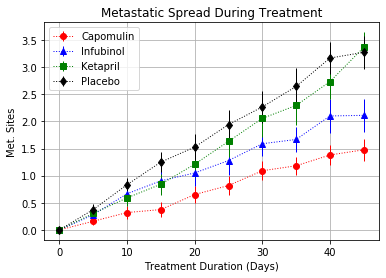

In [115]:
# Generate the Plot (with Error Bars)
# Save the Figure
# Show the Figure
std_plot_config(x_axis, flat_metas_drug_timepoint["Capomulin"], flat_sem_metas_drug_timepoint["Capomulin"],
               flat_metas_drug_timepoint["Infubinol"], flat_sem_metas_drug_timepoint["Infubinol"],
               flat_metas_drug_timepoint["Ketapril"], flat_sem_metas_drug_timepoint["Ketapril"],
               flat_metas_drug_timepoint["Placebo"], flat_sem_metas_drug_timepoint["Placebo"],
               "Treatment Duration (Days)", "Met. Sites", "Metastatic Spread During Treatment", 
                "Metastatic_Spread_During_Treatment", 500)

## Survival Rates

In [118]:
# Store the Count of Mice Grouped by Drug and Timepoint (W can pass any metric)
mice_drug_timepoint_group = full_df.groupby(["Drug", "Timepoint"]).count().reset_index()\
                                            .drop(columns=["Tumor Volume (mm3)", "Metastatic Sites"])
mice_drug_timepoint_group = mice_drug_timepoint_group.rename(columns={"Mouse ID": "Mouse Count"})

# Preview DataFrame
mice_drug_timepoint_group.head()

,Drug,Timepoint,Mouse Count
0,Capomulin,0,25
1,Capomulin,5,25
2,Capomulin,10,25
3,Capomulin,15,24
4,Capomulin,20,23


In [120]:
# Minor Data Munging to Re-Format the Data Frames
# .count() counts the number of instances
# .unstack() flattens data removing hierarchical indexing
# .drop() remove unwanted column
flat_mice_drug_timepoint = full_df.groupby(["Drug", "Timepoint"]).count()\
                                            .drop(columns=["Tumor Volume (mm3)", "Metastatic Sites"])\
                                            .unstack(level=0)
# Remove hierarchical column
flat_mice_drug_timepoint.columns = flat_mice_drug_timepoint.columns.droplevel()

# Preview the Data Frame
flat_mice_drug_timepoint.head()

Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


Drug,Capomulin,Ceftamin,Infubinol,Ketapril,Naftisol,Placebo,Propriva,Ramicane,Stelasyn,Zoniferol
Timepoint,,,,,,,,,,
0,25,25,25,25,25,25,26,25,26,25
5,25,21,25,23,23,24,25,25,25,24
10,25,20,21,22,21,24,23,24,23,22
15,24,19,21,19,21,20,17,24,23,21
20,23,18,20,19,20,19,17,23,21,17


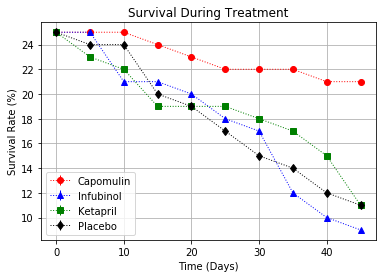

In [121]:
# Generate the Plot (Accounting for percentages)
# Save the Figure
# Show the Figure
std_plot_config(x_axis, flat_mice_drug_timepoint["Capomulin"], 0,
               flat_mice_drug_timepoint["Infubinol"], 0,
               flat_mice_drug_timepoint["Ketapril"], 0,
               flat_mice_drug_timepoint["Placebo"], 0,
               "Time (Days)", "Survival Rate (%)", "Survival During Treatment", 
                "Survival_During_Treatment", 500)

## Summary Bar Graph

In [128]:
# Calculate the percent changes for each drug
percent_change_tumor = (flat_drug_timepoint_group.loc[45,:]-flat_drug_timepoint_group.loc[0, :])/\
                        flat_drug_timepoint_group.loc[0, :]*100

# Display the data to confirm
percent_change_tumor

Drug
Capomulin   -19.475303
Ceftamin     42.516492
Infubinol    46.123472
Ketapril     57.028795
Naftisol     53.923347
Placebo      51.297960
Propriva     47.241175
Ramicane    -22.320900
Stelasyn     52.085134
Zoniferol    46.579751
dtype: float64

Text(0, 0.5, '% Tumor Volume Change')

Text(0.5, 1.0, 'Tumor Change Over 45 Days Treatment')

([<matplotlib.axis.YTick at 0x2bc212f0e48>,
 <a list of 41 Text yticklabel objects>)

(-30, 70)

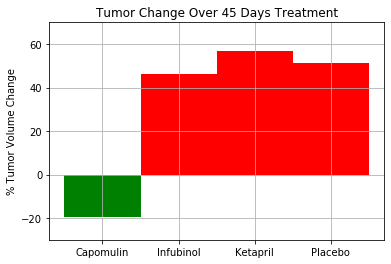

In [152]:
# Store all Relevant Percent Changes 
percent_change_clean = [percent_change_tumor["Capomulin"], percent_change_tumor["Infubinol"],
                        percent_change_tumor["Ketapril"], percent_change_tumor["Placebo"]]
percent_change_clean_labels = ["Capomulin", "Infubinol", "Ketapril", "Placebo"]

passing_drugs = []
passing_drugs_percent = []
failing_drugs = []
failing_drugs_percent = []

# Splice the data between passing and failing drugs
for drug, percent in zip(percent_change_clean_labels, percent_change_clean):
    if percent < 0:
        passing_drugs.append(drug)
        passing_drugs_percent.append(percent)
    else:
        failing_drugs.append(drug)
        failing_drugs_percent.append(percent)


# Orient widths. Add labels, tick marks, etc. 
rect1 = plt.bar(passing_drugs, passing_drugs_percent, color="green", width=1.0)
rect2 = plt.bar(failing_drugs, failing_drugs_percent, color="red", width=1.0)
plt.ylabel("% Tumor Volume Change") # Add label to the ordinate
plt.title("Tumor Change Over 45 Days Treatment") # Add title
plt.grid() # Add grid
plt.yticks(np.arange(-20, 800, 20))
plt.ylim(-30, 70)


# Use functions to label the percentages of changes

# Call functions to implement the function calls

# Save the Figure
# plt.savefig("Tumor_Change_Over_45_Days_Treatment", dpi=500)

# # Show the Figure
plt.show()

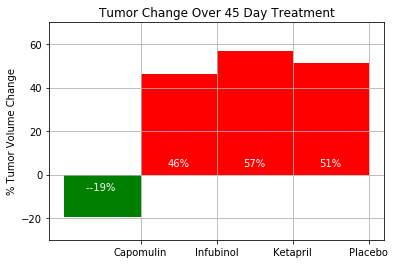